In [1]:
import os
from collections import defaultdict

def count_files_with_same_extension(directory):
    extension_count = defaultdict(lambda: defaultdict(int))

    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                file_extension = os.path.splitext(file)[1]
                extension_count[root][file_extension] += 1
            except PermissionError:
                print(f"Permission denied: {os.path.join(root, file)}, skipping this file.")
            except Exception as e:
                print(f"Error occurred: {e}. Skipping this file.")
    return extension_count

def print_extension_counts(extension_count):
    for dir_path, extensions in extension_count.items():
        print(dir_path + ":")
        for ext, count in extensions.items():
            print(f"- with {ext} files: {count}")

def main():
    try:
        directory = 'dataset/data_v1/train'
        if not os.path.exists(directory):
            print("Invalid directory path. Please ensure the directory exists.")
            return
        extension_count = count_files_with_same_extension(directory)
        print_extension_counts(extension_count)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

dataset/data_v1/train/images:
- with .jpg files: 7677
dataset/data_v1/train/labels:
- with .txt files: 7677


In [2]:
import os
from collections import defaultdict

def count_files_with_same_extension(directory):
    extension_count = defaultdict(lambda: defaultdict(int))

    for root, dirs, files in os.walk(directory):
        for file in files:
            try:
                file_extension = os.path.splitext(file)[1]
                extension_count[root][file_extension] += 1
            except PermissionError:
                print(f"Permission denied: {os.path.join(root, file)}, skipping this file.")
            except Exception as e:
                print(f"Error occurred: {e}. Skipping this file.")
    return extension_count

def print_extension_counts(extension_count):
    for dir_path, extensions in extension_count.items():
        print(dir_path + ":")
        for ext, count in extensions.items():
            print(f"- with {ext} files: {count}")

def main():
    try:
        directory = 'dataset/data_v1/valid'
        if not os.path.exists(directory):
            print("Invalid directory path. Please ensure the directory exists.")
            return
        extension_count = count_files_with_same_extension(directory)
        print_extension_counts(extension_count)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

dataset/data_v1/valid/images:
- with .jpg files: 1129
dataset/data_v1/valid/labels:
- with .txt files: 1129


dataset image size plotting

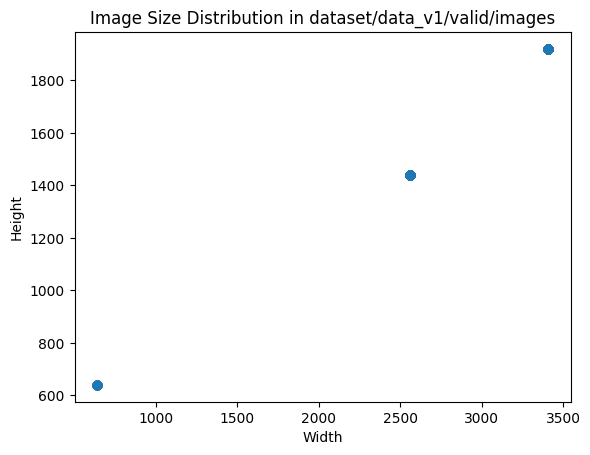

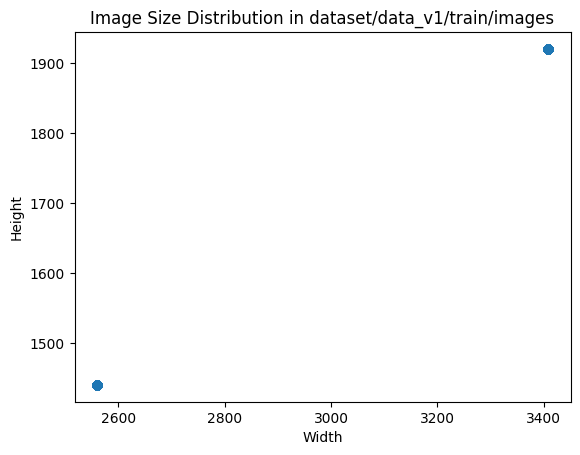

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def plot_image_sizes(directory):
    sizes = [Image.open(os.path.join(directory, file)).size for file in os.listdir(directory) if file.endswith('.jpg')]
    widths, heights = zip(*sizes)
    plt.scatter(widths, heights)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(f'Image Size Distribution in {directory}')
    plt.show()

plot_image_sizes('dataset/data_v1/valid/images')
plot_image_sizes('dataset/data_v1/train/images')

Statistics for dataset/data_v1/valid/images:
Width - Mean: 2894.341895482728, Median: 3408.0, Std: 737.3027904518597
Height - Mean: 1649.317980513729, Median: 1920.0, Std: 358.2058120130949


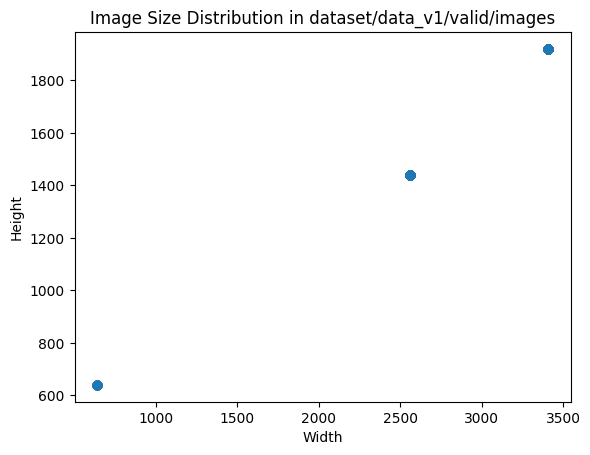

Statistics for dataset/data_v1/train/images:
Width - Mean: 3021.8324866484304, Median: 3408.0, Std: 422.30877679015424
Height - Mean: 1701.4146150840172, Median: 1920.0, Std: 239.04270384348357


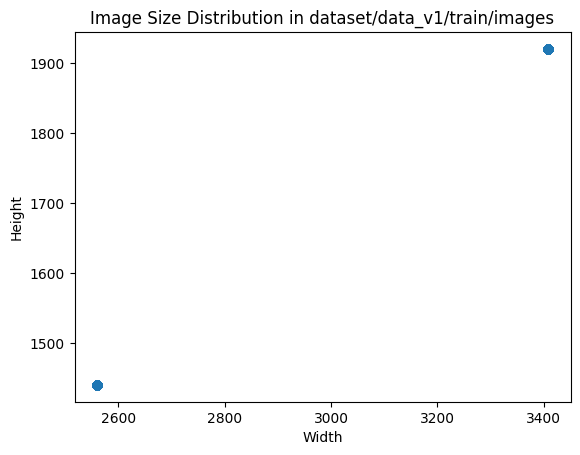

In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def plot_and_show_stats(directory):
    sizes = [Image.open(os.path.join(directory, file)).size for file in os.listdir(directory) if file.endswith('.jpg')]
    widths, heights = zip(*sizes)

    # Calculate statistics for widths
    mean_width = np.mean(widths)
    median_width = np.median(widths)
    std_width = np.std(widths)

    # Calculate statistics for heights
    mean_height = np.mean(heights)
    median_height = np.median(heights)
    std_height = np.std(heights)

    print(f"Statistics for {directory}:")
    print(f"Width - Mean: {mean_width}, Median: {median_width}, Std: {std_width}")
    print(f"Height - Mean: {mean_height}, Median: {median_height}, Std: {std_height}")

    # Plotting the graph
    plt.scatter(widths, heights)
    plt.xlabel('Width')
    plt.ylabel('Height')
    plt.title(f'Image Size Distribution in {directory}')
    plt.show()

plot_and_show_stats('data_v1/train/images')
plot_and_show_stats('data_v1/valid/images')

Kolmogorov-Smirnov Test

In [3]:
import cv2
import glob
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from scipy.stats import ks_2samp

def get_model():
    model = VGG16()
    return Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image)
    return feature.flatten()

def get_features_from_folder(folder_path, model):
    features = []
    for file_path in glob.glob(folder_path + '/*.jpg'):
        features.extend(extract_features(file_path, model)) # Use extend instead of append
    return np.array(features)

model = get_model()
train_features = get_features_from_folder('data_v1/train/images', model)
valid_features = get_features_from_folder('data_v1/valid/images', model)

# Flatten the arrays to 1D
train_features_flatten = train_features.flatten()
valid_features_flatten = valid_features.flatten()

# Apply K-S Test
statistic, pvalue = ks_2samp(train_features_flatten, valid_features_flatten)

print("K-S Test Statistic:", statistic)
print("P-value:", pvalue)

2023-08-16 13:35:22.971341: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-16 13:35:23.173166: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 13:35:23.705627: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-16 13:35:24.392828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

1/1 [==============================] - 0s 9ms/step
K-S Test Statistic: 0.002344304857054502
P-value: 1.136933536823893e-19


visualize the distribution

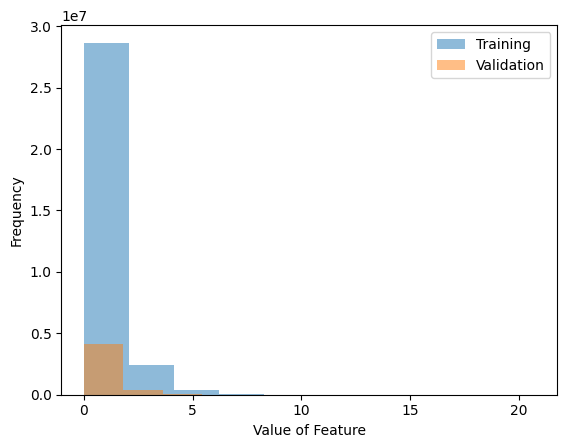

In [5]:
import matplotlib.pyplot as plt

plt.hist(train_features, alpha=0.5, label='Training')
plt.hist(valid_features, alpha=0.5, label='Validation')
plt.legend(loc='upper right')
plt.xlabel('Value of Feature')
plt.ylabel('Frequency')
plt.show()

describe and summarize the statistics method

In [6]:
import numpy as np

def describe_features(features, label):
    print(f"Statistics for {label}:")
    print("Mean:", np.mean(features))
    print("Standard Deviation:", np.std(features))
    print("Median:", np.median(features))
    print("Min:", np.min(features))
    print("Max:", np.max(features))

def create_histogram_bins(features, label, bins=10):
    hist, bin_edges = np.histogram(features, bins=bins)
    print(f"\nHistogram for {label}:")
    for b in range(bins):
        print(f"Bin {b+1} (from {bin_edges[b]} to {bin_edges[b+1]}): {hist[b]} values")

describe_features(train_features, 'Training')
describe_features(valid_features, 'Validation')

create_histogram_bins(train_features, 'Training')
create_histogram_bins(valid_features, 'Validation')

Statistics for Training:
Mean: 0.5208939
Standard Deviation: 1.0104312
Median: 0.0
Min: 0.0
Max: 20.718359
Statistics for Validation:
Mean: 0.5239814
Standard Deviation: 1.0192567
Median: 0.0
Min: 0.0
Max: 18.139105

Histogram for Training:
Bin 1 (from 0.0 to 2.071835994720459): 28647890 values
Bin 2 (from 2.071835994720459 to 4.143671989440918): 2382385 values
Bin 3 (from 4.143671989440918 to 6.215507507324219): 363184 values
Bin 4 (from 6.215507507324219 to 8.287343978881836): 44628 values
Bin 5 (from 8.287343978881836 to 10.359179496765137): 5776 values
Bin 6 (from 10.359179496765137 to 12.431015014648438): 900 values
Bin 7 (from 12.431015014648438 to 14.502851486206055): 156 values
Bin 8 (from 14.502851486206055 to 16.574687957763672): 53 values
Bin 9 (from 16.574687957763672 to 18.646522521972656): 15 values
Bin 10 (from 18.646522521972656 to 20.718358993530273): 5 values

Histogram for Validation:
Bin 1 (from 0.0 to 1.8139104843139648): 4111569 values
Bin 2 (from 1.81391048431396

Using t-SNE for Dimensionality Reduction

2023-08-16 13:43:54.966903: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-16 13:43:55.133864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-16 13:43:55.627170: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-08-16 13:43:56.289512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.

1/1 [==============================] - 0s 9ms/step


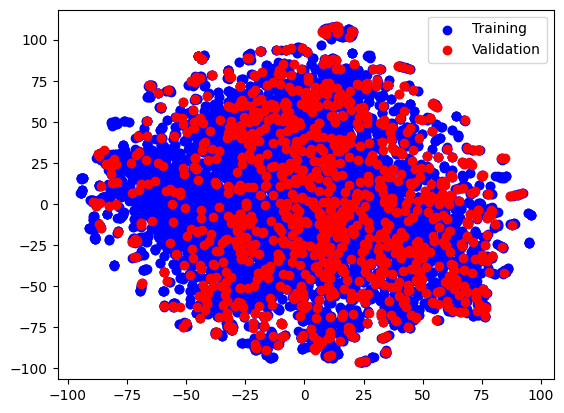

In [2]:
import cv2
import glob
import numpy as np
from keras.applications import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

def get_model():
    model = VGG16()
    return Model(inputs=model.inputs, outputs=model.layers[-2].output)

def extract_features(image_path, model):
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image)
    return feature.flatten()

def get_features_from_folder(folder_path, model):
    features = [extract_features(file_path, model) for file_path in glob.glob(folder_path + '/*.jpg')]
    return np.array(features)

model = get_model()
train_features = get_features_from_folder('data_v1/train/images', model)
valid_features = get_features_from_folder('data_v1/valid/images', model)

# Concatenate the features
all_features = np.concatenate((train_features, valid_features))

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_features = tsne.fit_transform(all_features)

# Separate the transformed features
train_reduced = reduced_features[:len(train_features)]
valid_reduced = reduced_features[len(train_features):]

# Plot
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c='b', label='Training')
plt.scatter(valid_reduced[:, 0], valid_reduced[:, 1], c='r', label='Validation')
plt.legend(loc='upper right')
plt.show()

excel file

In [3]:
import pandas as pd
import os

# Function to find the next available number for the filename
def get_next_file_number(directory):
    existing_files = glob.glob(directory + '/tsne_features*.csv')
    existing_numbers = [int(file.split('tsne_features')[1].split('.csv')[0]) for file in existing_files]
    return max(existing_numbers, default=-1) + 1

# Create a dataframe for training features
train_df = pd.DataFrame(train_reduced, columns=['Dimension 1', 'Dimension 2'])
train_df['Type'] = 'Training'

# Create a dataframe for validation features
valid_df = pd.DataFrame(valid_reduced, columns=['Dimension 1', 'Dimension 2'])
valid_df['Type'] = 'Validation'

# Concatenate both dataframes
final_df = pd.concat([train_df, valid_df], ignore_index=True)

# Directory to save the CSV file
directory = 'result-of-diversity-exp'
if not os.path.exists(directory):
    os.makedirs(directory)

# Determine the next available number
next_number = get_next_file_number(directory)

# Filename with the next available number
filename = f'{directory}/tsne_features{next_number}.csv'

# Save the dataframe to the CSV file
final_df.to_csv(filename, index=False)

print(f'File saved to {filename}')

File saved to result-of-diversity-exp/tsne_features0.csv
